In [126]:
import re, json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
PATH = 'data/'

In [128]:
AGE_GENDER = 'age_gender_bkts.csv'
COUNTRIY = 'countries.csv'
SESSIONS = 'sessions.csv'

TRAIN_USERS = 'train_users.csv'
TEST_USERS = 'test_users.csv'

SAMPLE = 'sample_submission_NDF.csv'

In [129]:
age_df = pd.read_csv(PATH + AGE_GENDER)
country_df = pd.read_csv(PATH + COUNTRIY)
session_df = pd.read_csv(PATH + SESSIONS)

train_df = pd.read_csv(PATH + TRAIN_USERS)
test_df = pd.read_csv(PATH + TEST_USERS)

sample_df = pd.read_csv(PATH + SAMPLE)

In [130]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


# 1 데이터 분석

## 1.1 데이터 값 종류

In [131]:
train_df['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

## 1.2 데이터 요약통계

In [132]:
train_df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [133]:
train_df.age.mean() # train_df['age'].mean()

49.66833517985669

## 1.3 데이터 값 분석

In [134]:
train_df['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

## 1.4 null 데이터 확인

In [135]:
pd.isnull(train_df)  #null이 아닌지 확인할때는 pd.notnull(obj)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
213447,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
213448,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
213449,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False


In [136]:
train_df['gender'].isna().sum() #gender에서 결측치 개수

0

In [137]:
train_df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## 1.5 데이터 타입 확인

In [138]:
train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.6 컬럼이름

In [139]:
#컬럼 이름 확인
train_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [140]:
#컬럼 이름으로 조회
train_df['country_destination']

0           NDF
1           NDF
2            US
3         other
4            US
          ...  
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destination, Length: 213451, dtype: object

In [141]:
#여러 컬럼 조회
train_df[['age','gender']]

,age,gender
0,NaN,-unknown-
1,38.0,MALE
2,56.0,FEMALE
3,42.0,FEMALE
4,41.0,-unknown-
...,...,...
213446,32.0,MALE
213447,NaN,-unknown-
213448,32.0,-unknown-
213449,NaN,-unknown-


In [142]:
#컬럼 조건 검색
train_df[(train_df['age']>10)&(train_df['gender']=='FEMALE')] 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213425,l1f71f9vsj,2014-06-30,20140630232119,NaN,FEMALE,30.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213440,04y8115avm,2014-06-30,20140630234933,NaN,FEMALE,24.0,basic,25,en,direct,direct,untracked,iOS,iPhone,Mobile Safari,NDF
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


## 1.7 인덱싱

In [143]:
# 행 인덱스
train_df.iloc[:5]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [144]:
train_df.loc[train_df['gender']=='FEMALE'] #이건 굳이 loc안써도 됨

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213425,l1f71f9vsj,2014-06-30,20140630232119,NaN,FEMALE,30.0,facebook,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213440,04y8115avm,2014-06-30,20140630234933,NaN,FEMALE,24.0,basic,25,en,direct,direct,untracked,iOS,iPhone,Mobile Safari,NDF
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


In [145]:
#행,열인덱스 loc[행,열]
train_df.loc[train_df['gender']=='FEMALE', 'age']

2         56.0
3         42.0
6         46.0
7         47.0
8         50.0
          ... 
213425    30.0
213440    24.0
213441    34.0
213443    36.0
213445    23.0
Name: age, Length: 63041, dtype: float64

In [146]:
train_df.loc[train_df['gender']=='FEMALE', ['age','gender']]

,age,gender
2,56.0,FEMALE
3,42.0,FEMALE
6,46.0,FEMALE
7,47.0,FEMALE
8,50.0,FEMALE
...,...,...
213425,30.0,FEMALE
213440,24.0,FEMALE
213441,34.0,FEMALE
213443,36.0,FEMALE


## 1.8 데이터 분포

<AxesSubplot:>

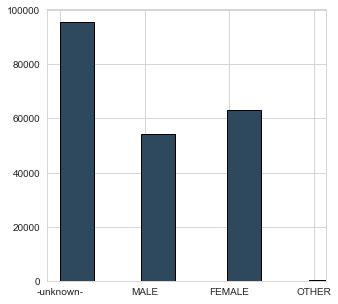

In [147]:
#하나의 컬럼 분포
train_df['gender'].hist(bins=50, width = 0.4, figsize= (5,5), facecolor = "#2E495E", edgecolor = (0,0,0))

c:\users\hanay\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


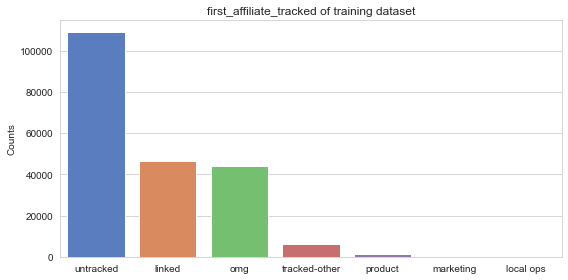

In [148]:
feat_train = train_df['first_affiliate_tracked'].value_counts()
fig = plt.figure(figsize=(8,4))
sns.set_palette("muted") #색 지정 
sns.barplot(feat_train.index.values, feat_train.values)
plt.title('first_affiliate_tracked of training dataset')
plt.ylabel('Counts')
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'untracked'),
  Text(1, 0, 'omg'),
  Text(2, 0, 'linked'),
  Text(3, 0, 'tracked-other'),
  Text(4, 0, 'product'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'local ops')])

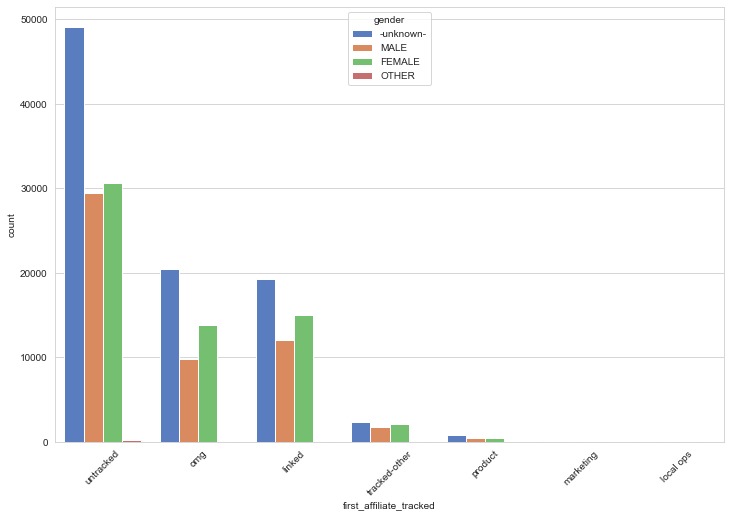

In [149]:
#두 열 간 분포 보기
plt.figure(figsize=(12, 8))
sns.countplot(x=train_df['first_affiliate_tracked'],
              hue='gender',
              data=train_df)
plt.xticks(rotation=45)

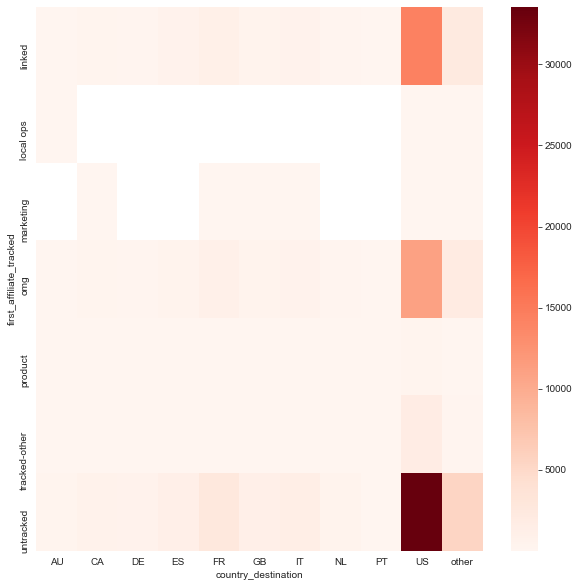

In [150]:
#히트맵으로도 볼 수 있음
notndf = train_df[train_df['country_destination']!='NDF']
lang = notndf.groupby(['first_affiliate_tracked','country_destination']).id.count().reset_index()
plt.figure(figsize=(10,10))
fig = sns.heatmap(lang.pivot_table(values='id',index='first_affiliate_tracked',columns='country_destination',aggfunc='sum'), cmap='Reds')

In [195]:
#레이블 별 특징 분포 그래프
def plot_feature_by_label(dataframe, feature_name, label_name, title):
    try:
        print(feature_name)
        sns.set_style("whitegrid")
        ax = sns.FacetGrid(dataframe, hue=label_name,aspect=2.5)
        ax.map(sns.kdeplot,feature_name,shade=True)
        ax.set(xlim=(0, dataframe[feature_name].max()))
        ax.add_legend()
        ax.set_axis_labels(feature_name, 'proportion')
        ax.fig.suptitle(title)
        plt.show()
    except:
        print("skip")
        plt.show()

date_account_created


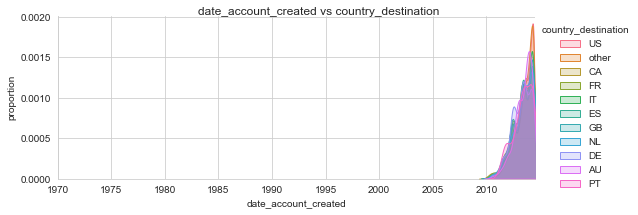

timestamp_first_active


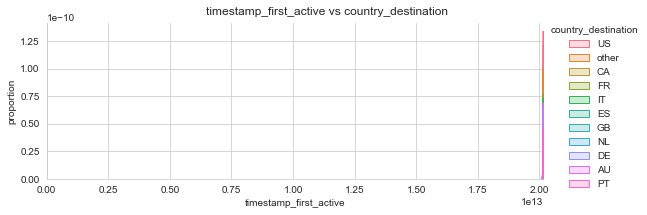

date_first_booking


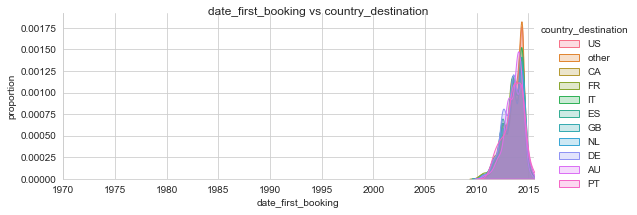

gender
skip


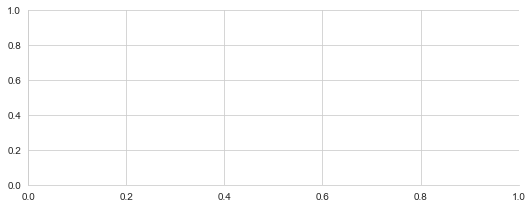

age


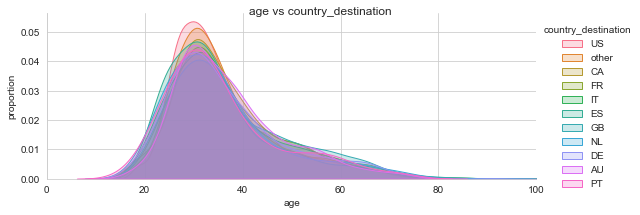

signup_method
skip


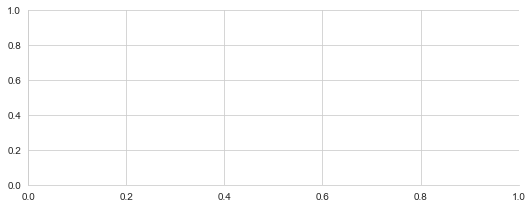

signup_flow


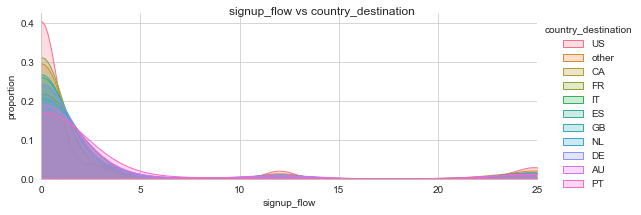

language
skip


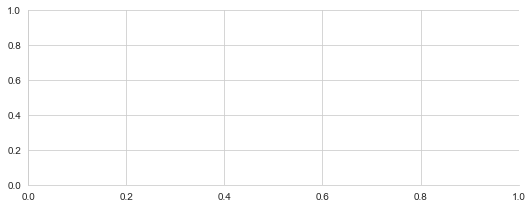

affiliate_channel
skip


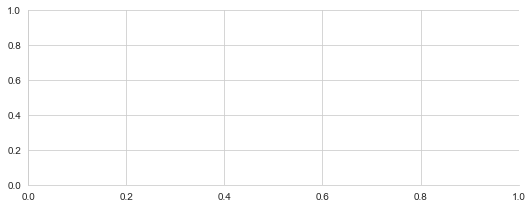

affiliate_provider
skip


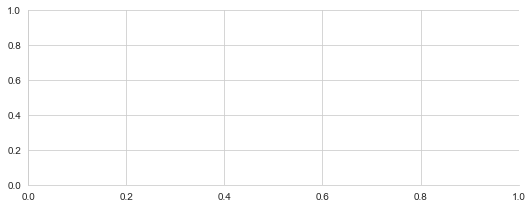

first_affiliate_tracked
skip


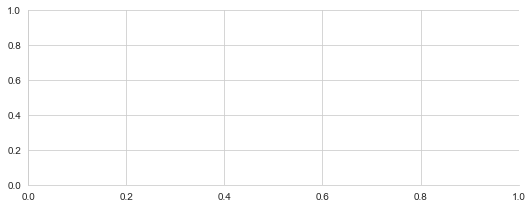

signup_app
skip


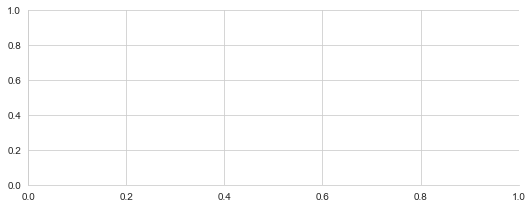

first_device_type
skip


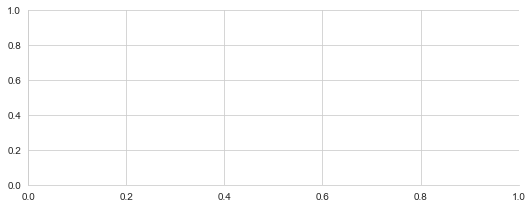

first_browser
skip


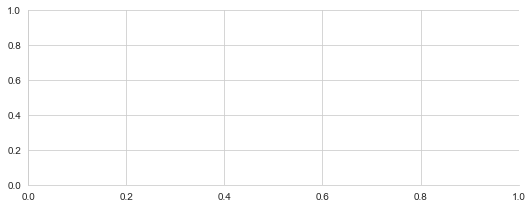

In [196]:
for feature_name in train_df.drop(['country_destination','id'],axis=1).keys():
    plot_feature_by_label(train_df, feature_name, 'country_destination', feature_name + ' vs country_destination')
    
#이번 같이 데이터값 대부분이 문자인 경우엔 잘 안됨
#x 데이터형이 [숫자, 날짜]중 하나로 치환되어야함!

# 2 데이터 전처리

## 2.1 이상치를 특정 값으로

In [156]:
#결측치로 처리
train_df.loc[~train_df['age'].between(18, 100), 'age'] = np.nan

## 2.2 중복/누락 데이터 처리

In [157]:
#중복 행 조회
train_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
213446    False
213447    False
213448    False
213449    False
213450    False
Length: 213451, dtype: bool

In [158]:
#중복 행 제거
train_df = train_df.drop_duplicates()

In [159]:
#누락 데이터 제거
train_df = train_df.dropna()

In [160]:
#누락 데이터 채우기
train_df = train_df.fillna(0) #0으로 채워짐

## 2.3 행&열 삭제

In [161]:
#drop 함수로 열 삭제
train_data = train_df.drop('id',axis=1) #행 삭제할 땐 axis=0

특정 열 값들 가져오기

In [162]:
genders = [x for x in train_df['gender']]
genders

['FEMALE',
 'FEMALE',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 'FEMALE',
 'MALE',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 '-unknown-',
 '-unknown-',
 'MALE',
 'MALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 'MALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 '-unknown-',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 'MALE',
 'OTHER',
 'FEMALE',
 'FEMALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 'FEMALE',
 'MALE',
 'FEMALE',
 'MALE',
 'FEMALE',
 'MALE',
 '-unknown-',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 'FEMALE',
 '-unknown-',
 'MALE',
 'MALE',
 'FEMALE',
 '-unknown-',
 '-unknown-',
 '-unknown-',
 'MALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 'FEMALE',
 'FEMALE',
 'MALE',
 'FEMALE',
 '-unknown-',
 'MALE',
 'FEMALE',
 'FEMALE',
 'MALE',
 'FEMALE',
 'FEMALE',
 'FEMALE',
 '-unknown-',
 '-unknown-',
 '-unknown-',
 'MALE',
 'MALE',
 'MALE',
 'MALE',
 'MALE',
 '-unkn

## 2.4 One-hot-encoding

In [ ]:
cat_features = ['gender',  'first_browser']
for f in cat_features:
    data_dummy = pd.get_dummies(train_df[f], prefix=f) # encode categorical variables
    train_df.drop([f], axis=1, inplace = True) # drop encoded variables
    train_df = pd.concat((train_df, data_dummy), axis=1) # concat numerical and categorical variables

train_df

## 2.5 시계열 데이터로 변환

In [163]:
train_df['date_account_created'] = pd.to_datetime(train_df['date_account_created'])
train_df['date_first_booking'] = pd.to_datetime(train_df['date_first_booking'])


date = train_df['date_account_created']
sub = train_df['date_first_booking'] - train_df['date_account_created']

import datetime
len([x for x in sub if x < datetime.timedelta(days=10)])

40846

# 3 상관관계 분석

<AxesSubplot:>

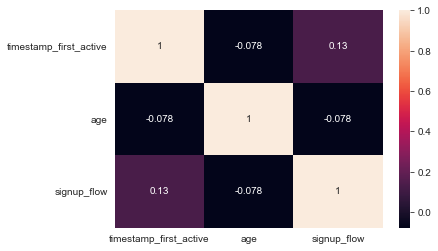

In [164]:
sns.heatmap(train_df.corr(), annot=True) #dtype이 수치형인것만 나오는거같음..

In [165]:
train_df.corr()

,timestamp_first_active,age,signup_flow
timestamp_first_active,1.000000,-0.077671,0.132124
age,-0.077671,1.000000,-0.077737
signup_flow,0.132124,-0.077737,1.000000


# 4 훈련/테스트 데이터 분리

## 4.1 레이블 분리

In [166]:
X, y = train_df.drop('country_destination',axis= 1), train_df['country_destination']

## 4.2 데이터 분할

In [167]:
from sklearn.model_selection import train_test_split # 데이터 셋 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 5 주성분 분석

데이터가 숫자로 되어있어야 해서 다른 데이터 사용
//url을 통해 데이터 다운

In [170]:
import requests

data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")
dataset_path = os.path.join('data', 'wdbc.data')
columns = [
    "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
    "compactness_mean", "concavity_mean", "points_mean", "symmetry_mean", "dimension_mean", 
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", 
    "compactness_se", "concavity_se", "points_se", "symmetry_se", "dimension_se", 
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
    "compactness_worst", "concavity_worst", "points_worst", "symmetry_worst", "dimension_worst",
    ]


with open(dataset_path, "w") as f:
  f.write(data.text)

dataset = pd.read_csv(dataset_path, names=columns)
dataset.sample(5)
X = dataset[dataset.columns[1:]]
dataset['target'] = (dataset['diagnosis']=='B')*0 + \
                   (dataset['diagnosis']=='M')*1
y = dataset['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

RFECV 실행

In [171]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
min_features_to_select = 1
clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=12)
rfe = RFECV(estimator = clf, 
           step=1,
           cv=5,
           scoring='accuracy',
           min_features_to_select = min_features_to_select
           )
rfe = rfe.fit(X_train,Y_train)

특징 선택을 위한 훈련 과정의 성능 그래프

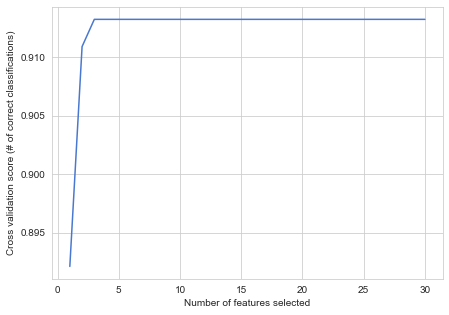

In [172]:
plt.figure(figsize=(7,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(min_features_to_select, len(rfe.grid_scores_)+min_features_to_select), rfe.grid_scores_)
plt.show()

위 사진을 보면 특징을 3개정도까지만 써도 충분한 정확도를 보여주고 그것보다 많은 특징을 썼을땐 성능을 그렇게 좌우하지 않는 걸 볼 수있음

선택된 특징 확인

In [173]:
best_features = X_train.columns.values[rfe.support_]
drop_features = [ column_name for column_name in columns[1:] if column_name not in best_features ]

print('Optimal number of features :', rfe.n_features_)
print('Best features :', best_features)
print('Drop features :', drop_features)

Optimal number of features : 3
Best features : ['concavity_mean' 'radius_worst' 'points_worst']
Drop features : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se', 'dimension_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'dimension_worst']


# 6 랜덤 포레스트

In [176]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features=4,random_state=0)
clf.fit(X_train,Y_train)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train,Y_train)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test,Y_test)))

Accuracy of Random Forest Classifier on training data: 1.00
Accuracy of Random Forest Classifier on testing data: 0.97


## 모델 평가

In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = clf
prediction = model.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, prediction)
cnf_matrix

array([[94,  3],
       [ 2, 44]], dtype=int64)

In [198]:
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        97
           1       0.94      0.96      0.95        46

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

